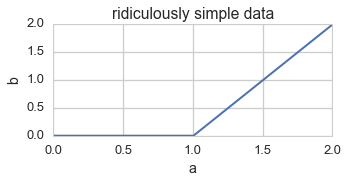

In [1]:
# <!-- collapse=True -->
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')
sns.set_context('talk')

n_points = 200
x = np.linspace(0, 2, n_points)
y = np.array([0] * int(n_points / 2) + list(x[:int(n_points / 2)])) * 2

plt.figure(figsize=(5, 2))
plt.plot(x, y, linewidth=2)
plt.title('ridiculously simple data')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

np.random.seed(0)
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')

# print initial weigths
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
'neural net initialized with weigths w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals())

'neural net initialized with weigths w0: 0.09, w1: 0.00'

In [4]:
# <!-- collapse=True -->
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X_train)
            self.predictions.append(pred)
            
history = TrainingHistory()

In [5]:
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
model.fit(X_train,
          Y_train,
          nb_epoch=2000,
          verbose=0,
          callbacks=[history])

# print trained weights
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
'neural net weigths after training w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals())

'neural net weigths after training w0: 1.69, w1: -1.54'

In [6]:
# <!-- collapse=True -->
# save the animation
import matplotlib.animation as animation

fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[0],  label='prediction')
plt.legend(loc='upper left')

def update_line(num):
    plt.title('iteration: {0}'.format((history.save_every * (num + 1))))
    line.set_xdata(x)
    line.set_ydata(history.predictions[num])
    return []

ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                   interval=50, blit=True)
ani.save('../videos/neuron.mp4', extra_args=['-vcodec', 'libx264'])
plt.close()

plt.figure(figsize=(5, 2.5))
plt.plot(x, y, label='data')
plt.plot(x, history.predictions[0], label='prediction')
plt.legend(loc='upper left')
plt.title('iteration: 0')
plt.savefig('../images/neuron_start.png')
plt.close()

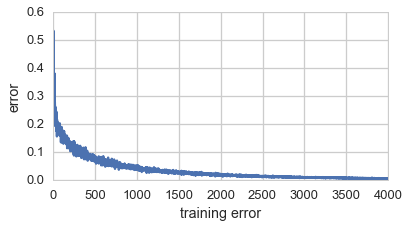

In [7]:
plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.xlabel('training error')
plt.show()

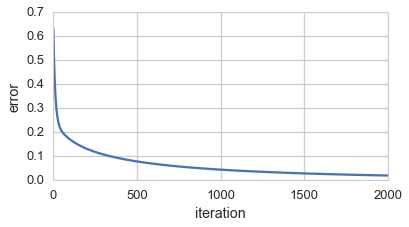

In [8]:
history = TrainingHistory()
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1, init="normal"))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train,
          Y_train,
          batch_size=200,
          nb_epoch=2000,
          verbose=0,
          callbacks=[history])

plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.show()

In [ ]:
from keras import backend as K

def get_layer_outoput(layer):
    return K.function([model.layers[0].input],
                      [model.layers[layer].get_output(train=False)])

print('weigths')
print(model.layers[0].get_weights())
#print(model.layers[2].get_weights())
print()

#print(model.layers[0].get_weights())

# print('layers for input 0')
# print(get_layer_outoput(0)([X_train[0:1,:]])[0])
# print(get_layer_outoput(1)([X_train[0:1,:]])[0])
# #print(get_layer_outoput(2)([X_train[0:1,:]])[0])
# print()

# print('layers for input 0.5')
# print(get_layer_outoput(0)([X_train[5:6,:]])[0])
# print(get_layer_outoput(1)([X_train[5:6,:]])[0])
# #print(get_layer_outoput(2)([X_train[5:6,:]])[0])
# print()

# print('layers for input 1')
# print(get_layer_outoput(0)([X_train[10:11,:]])[0])
# print(get_layer_outoput(1)([X_train[10:11,:]])[0])
#print(get_layer_outoput(2)([X_train[10:11,:]])[0])